# Adidas US Sales Data

#### ETU20232291-Meghana Mekala

In [170]:
#Import librairies 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Question 1: Importing, Data-Frame Information & Cleaning


In [172]:
# a) Import dataset
df = pd.read_excel('Adidas_US_Sales_Dataset.xlsx')
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,NaN,1000.0,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,NaN,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,NaN,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1234.80,0.42,Outlet


In [174]:
# b.Display the column names in the DataFrame
display("Columns in the DataFrame:", df.columns)


'Columns in the DataFrame:'

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [176]:
# b.Display the data types of each column
display( df.dtypes)

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                 float64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

In [178]:
# b.Display a concise summary of the DataFrame including non-null counts and data types
print("DataFrame Information:")
display(df.info())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9643 non-null   float64       
 8   Units Sold        9647 non-null   float64       
 9   Total Sales       9645 non-null   float64       
 10  Operating Profit  9646 non-null   float64       
 11  Operating Margin  9645 non-null   float64       
 12  Sales Method      9642 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
m

None

In [180]:
# b.Display the shape of the DataFrame (number of rows and columns)
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (9648, 13)


In [182]:
# b.list of missing values by column
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      5
Units Sold          1
Total Sales         3
Operating Profit    2
Operating Margin    3
Sales Method        6
dtype: int64

In [184]:
# c) Clean data-frame (df) – The missing data process should comply with the following conditions

In [186]:
# Categorical variables: Replace by the Mode: Calculates the column mode and uses
# the mode value as the replacement value for each missing value in the column.
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    df[col]=df[col].fillna(df[col].mode()[0])  # Replace NaN with column mode

In [194]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

# Fill numerical missing values with median by 'Product'
for col in num_cols:
    df[col] = df.groupby('Product')[col].transform(lambda x: x.fillna(x.median()))

# Fill categorical missing values with mode by 'Product'
for col in cat_cols:
    df[col] = df.groupby('Product')[col].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else "Unknown"))


In [196]:
# list of missing values by column
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [198]:
# check for any duplicate values and remove it
df = df.drop_duplicates()

# 2. Data Manipulation & Analysis

In [233]:
# a) Minimum "Operating Margin" "Operating Profit" per "Region" and "Sales Method".

min_values = df.groupby(['Region', 'Sales Method'])[['Operating Margin', 'Operating Profit']].min()
print("Minimum Operating Margin and Profit per Region & Sales Method:\n\n", min_values)


Minimum Operating Margin and Profit per Region & Sales Method:

                         Operating Margin  Operating Profit
Region    Sales Method                                    
Midwest   In-store                  0.30           3062.50
          Online                    0.30              0.00
          Outlet                    0.25              0.00
Northeast In-store                  0.25           2625.00
          Online                    0.33             93.38
          Outlet                    0.20             75.20
South     In-store                  0.35          35437.50
          Online                    0.25            271.89
          Outlet                    0.20            217.58
Southeast In-store                  0.20          10500.00
          Online                    0.25            339.30
          Outlet                    0.20            508.95
West      In-store                  0.15          12250.00
          Online                    0.21          

In [237]:
# b.Most Sold "Product" per  "Region" based on "units Sold"
print("Most Sold Product per  Region based on units Sold:\n")

regions = df['Region'].unique()
for region in regions:
    regional_data = df[df['Region'] == region]
    top_product = regional_data.groupby('Product')['Units Sold'].sum().idxmax()
    print(f"- {region}: Most Sold Product Per Region is {top_product}")



Most Sold Product per  Region based on units Sold:

- Northeast: Most Sold Product Per Region is Men's Street Footwear
- South: Most Sold Product Per Region is Men's Street Footwear
- West: Most Sold Product Per Region is Men's Street Footwear
- Midwest: Most Sold Product Per Region is Men's Street Footwear
- Southeast: Most Sold Product Per Region is Men's Street Footwear


In [239]:
# c) Retailer, Region, City with highest Total Sales

max_row = df[df['Total Sales'] == df['Total Sales'].max()]
print("Location with highest total sales:\n\n", max_row[['Retailer', 'Region', 'City']])


Location with highest total sales:

        Retailer     Region         City
1394    Walmart  Southeast      Orlando
1970  West Gear      South  New Orleans


In [241]:
# d) California records where Operating Margin > 0.5% and month is May

df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
california_may = df[
    (df['State'] == 'California') &
    (df['Operating Margin'] > 0.005) &
    (df['Invoice Date'].dt.month == 5)
]
print("California sales in May with Operating Margin > 0.5%:\n\n", california_may)


California sales in May with Operating Margin > 0.5%:

          Retailer  Retailer ID Invoice Date Region       State         City  \
254        Kohl's      1189833   2021-05-01   West  California  Los Angeles   
255        Kohl's      1189833   2021-05-02   West  California  Los Angeles   
256        Kohl's      1189833   2021-05-03   West  California  Los Angeles   
257        Kohl's      1189833   2021-05-04   West  California  Los Angeles   
258        Kohl's      1189833   2021-05-05   West  California  Los Angeles   
...           ...          ...          ...    ...         ...          ...   
8056       Kohl's      1189833   2021-05-27   West  California  Los Angeles   
8057       Kohl's      1189833   2021-05-28   West  California  Los Angeles   
8058       Kohl's      1189833   2021-05-29   West  California  Los Angeles   
8059       Kohl's      1189833   2021-05-30   West  California  Los Angeles   
8060  Foot Locker      1185732   2021-05-31   West  California  Los Angeles

# Question 3- Data Visualization
####  the Data Visualization, we are using Pandas and Matplotlib to visualize (df)Data. Draw
####   the graphs with (“Title”, “Label-Name”, “Legend” , Color, …. Etc ….)

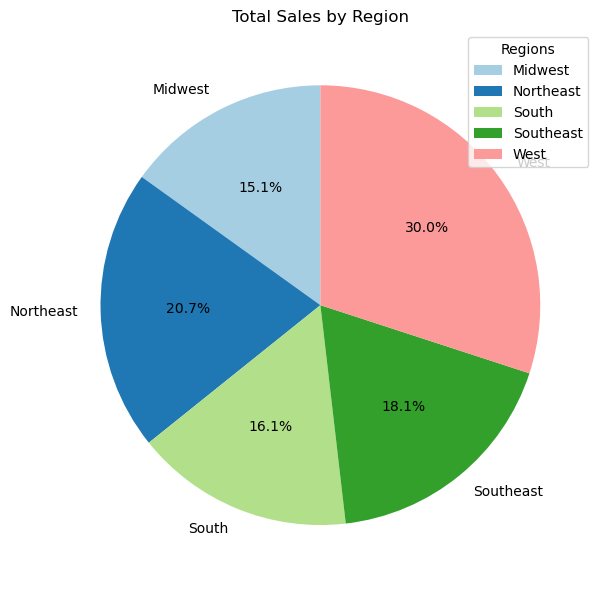

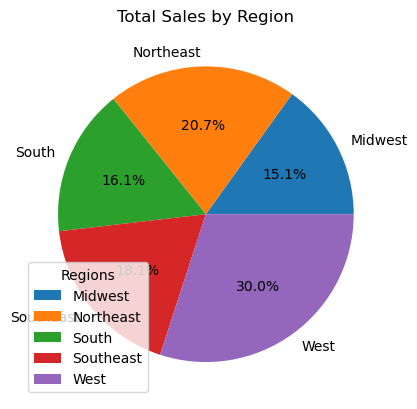

In [212]:
# a) Pie chart of Total Sales per Region

region_sales = df.groupby('Region')['Total Sales'].sum()

plt.figure(figsize=(8, 6))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Total Sales by Region")
plt.legend(title="Regions", loc="best")
plt.tight_layout()
plt.show()

# another way
region_sales = df.groupby('Region')['Total Sales'].sum()
region_sales.plot(kind='pie', autopct='%1.1f%%', title='Total Sales by Region')
plt.ylabel('')
plt.legend(title="Regions", loc="best")
plt.show()



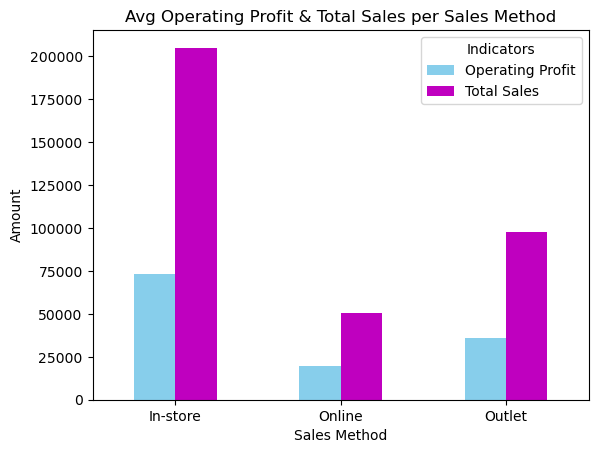

In [214]:
# b).bar chart comparing the average "Operating Profit" and "Total Sales" per "Sales Method".

sales_method_avg = df.groupby('Sales Method')[['Operating Profit', 'Total Sales']].mean()
sales_method_avg.plot(kind='bar', color=['skyblue', 'm'])
plt.title('Avg Operating Profit & Total Sales per Sales Method')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend()
plt.legend(title="Indicators")
plt.show()


#df.groupby('Sales Method')[['Operating Profit', 'Total Sales']].mean().plot(kind='barh', title='Avg Operating Profit & Total Sales per Sales Method')
#plt.xlabel('Amount')
#plt.ylabel('Sales Method')
#plt.legend()
#plt.xticks(bins)
#plt.show()

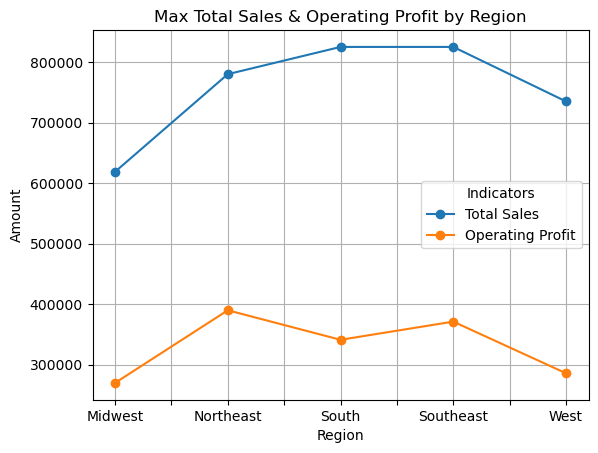

In [216]:
# c) Line graph - Max Total Sales and Operating Profit per Region

region_max = df.groupby('Region')[['Total Sales', 'Operating Profit']].max()
region_max.plot(kind='line', marker='o')
plt.title('Max Total Sales & Operating Profit by Region')
plt.ylabel('Amount')
plt.grid()
plt.legend(title="Indicators")
plt.show()

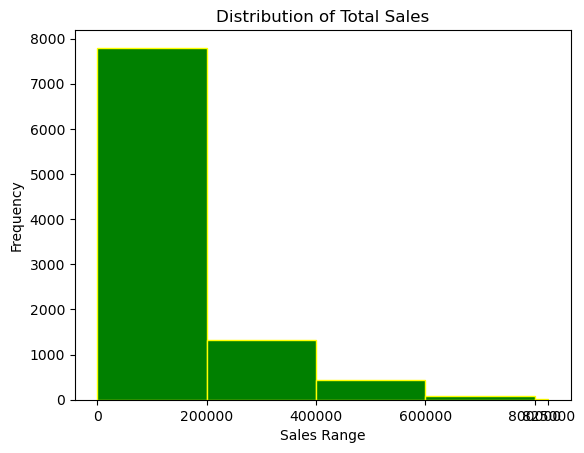

In [218]:
# d) Histogram - Distribution of Total Sales

bins = [0, 200000, 400000, 600000, 800000, df['Total Sales'].max()]
plt.hist(df['Total Sales'], bins=bins, color='green', edgecolor='yellow')
plt.title('Distribution of Total Sales')
plt.xlabel('Sales Range')
plt.ylabel('Frequency')
plt.xticks(bins)
plt.show()



## Question 4: Data Coding Challenge 

#Sales Performance Index (SPI) by `Sales Method`:

#"In-store": `SPI = Operating Profit / Total Sales`
#"Outlet": `SPI = Operating Profit / (Total Sales + 10)`
#"Online": `SPI = Operating Profit / (Total Sales + 20)`

df['Sales Performance Index'] = df['Operating Profit'] / df['Total Sales']
df['Outlet'] = df['Operating Profit'] / (df['Total Sales']+10)
df['Online'] = df['Operating Profit'] / (df['Total Sales']+20)

In [224]:
# Define a function to calculate Sales Performance Index based on Sales Method


def calculate_spi(row):
    if row['Sales Method'] == 'In-store':
        return row['Operating Profit'] / row['Total Sales'] if row['Total Sales'] != 0 else 0
    elif row['Sales Method'] == 'Outlet':
        return row['Operating Profit'] / (row['Total Sales'] + 10)
    elif row['Sales Method'] == 'Online':
        return row['Operating Profit'] / (row['Total Sales'] + 20)


# Apply the function to the DataFrame
df['Sales Performance Index'] = df.apply(calculate_spi, axis=1)

# Calculate averages
avg_spi = df['Sales Performance Index'].mean()
avg_margin = df['Operating Margin'].mean()

# Create a flag for last 10 days of each month
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['Day'] = df['Invoice Date'].dt.day
df['Days in Month'] = df['Invoice Date'].dt.days_in_month
df['Last10Days'] = df['Day'] > (df['Days in Month'] - 10)

# Filter for eligible products
promo_products = df[(df['Sales Performance Index'] > avg_spi) &
              (df['Operating Margin'] > avg_margin) &
              (df['Last10Days'])]

# Display unique products eligible for promotion
print("Products eligible for promotion:")
print(promo_products['Product'].unique())

# Select and display the country and region names
products_Eligible = promo_products[['Region', 'Product']]

display(products_Eligible)


Products eligible for promotion:
["Men's Street Footwear" "Women's Apparel" "Women's Athletic Footwear"
 "Men's Apparel" "Women's Street Footwear" "Men's Athletic Footwear"]


,Region,Product
12,Northeast,Men's Street Footwear
18,Northeast,Men's Street Footwear
56,Northeast,Men's Street Footwear
73,South,Women's Apparel
77,South,Women's Athletic Footwear
...,...,...
9237,South,Men's Street Footwear
9239,South,Women's Street Footwear
9240,South,Women's Athletic Footwear
9573,Northeast,Men's Street Footwear


In [227]:
# Another way
# Define and calculate Sales Performance Index (Assuming it's: Units Sold * Price per Unit)

df['Sales Performance Index'] = df['Units Sold'] * df['Price per Unit']

# Average values
avg_spi = df['Sales Performance Index'].mean()
avg_margin = df['Operating Margin'].mean()

# Last 10 days of each month
df['Day'] = df['Invoice Date'].dt.day
df['Last10Days'] = df['Invoice Date'].dt.days_in_month - df['Day'] < 10

# Filter products for promotion
promo_products = df[(df['Sales Performance Index'] > avg_spi) &
                    (df['Operating Margin'] > avg_margin) &
                    (df['Last10Days'])]

# Select and display the country and region names
Eligible = promo_products[['Region', 'Product']]

print(Eligible['Product'].unique())

display(Eligible)

["Men's Street Footwear" "Women's Apparel" "Women's Athletic Footwear"
 "Men's Apparel" "Women's Street Footwear" "Men's Athletic Footwear"]


,Region,Product
12,Northeast,Men's Street Footwear
18,Northeast,Men's Street Footwear
56,Northeast,Men's Street Footwear
73,South,Women's Apparel
77,South,Women's Athletic Footwear
...,...,...
7915,South,Women's Apparel
7962,West,Men's Apparel
8101,South,Women's Apparel
8527,Southeast,Men's Apparel
